In [3]:
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy import sin, cos, pi
import numpy as np
from scipy.integrate import odeint
from IPython.display import HTML

import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 240

from matplotlib import rc

rc('text', usetex=True)

frames completed


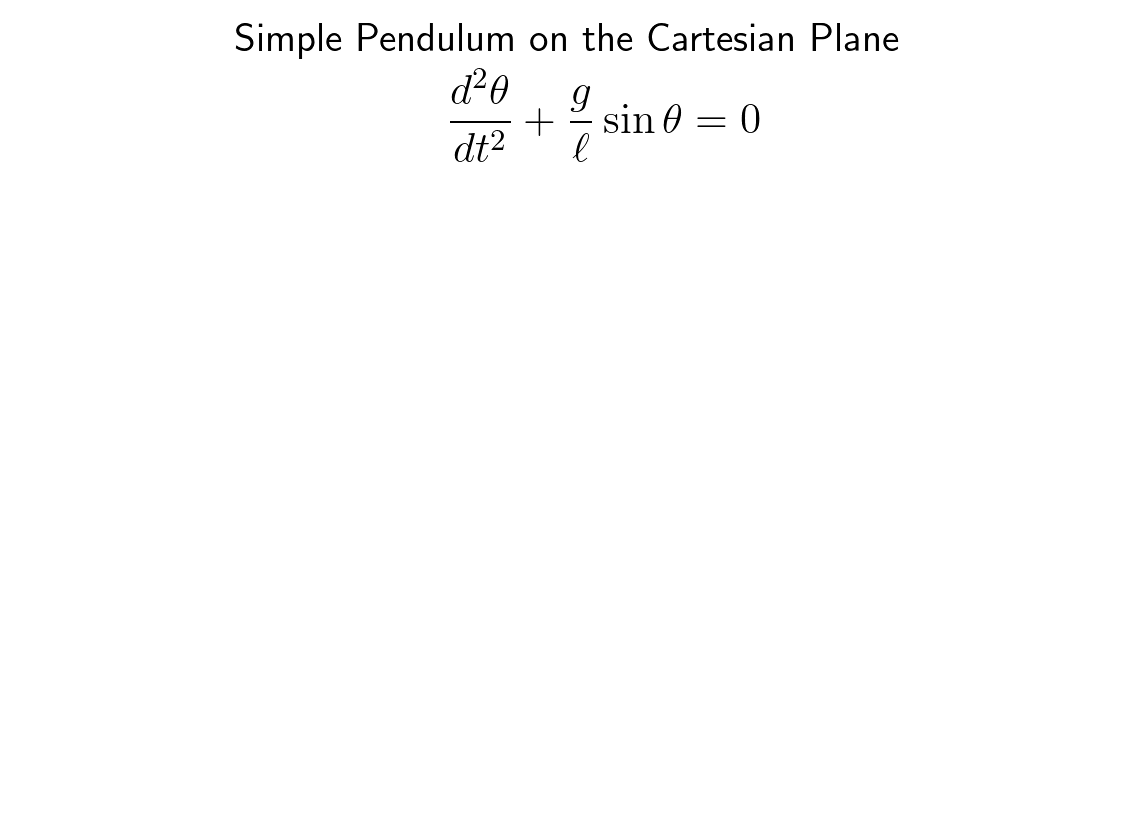

In [19]:
def simple_pendulum_ode(conditions, t, ℓ=20, g=980):
    # state of θ and ω is in the conditions list
    θ, ω = conditions
    
    dydt = [-0.000005*ω, -g/ℓ*sin(θ)]
    return dydt

θ_inital = pi/2 + 0.01
ω_inital = -0.05

t_list = np.linspace(0, .4*5*5*5, 5*100)

ℓ = 20

solutions = odeint(simple_pendulum_ode, [θ_inital, ω_inital], t_list)
# odeint solves for θ and ω over the interval in t_list, it pases conditions = [θ_inital, ω_inital] 
# for the first call of simple_pendulum_ode().

θ_solution_list = [i[0] for i in solutions]

x_0 = 0
y_0 = 35


fig = plt.figure()


ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-60, 60), ylim=(0, 80))
#plt.grid()

plt.title('Simple Pendulum on the Cartesian Plane')
#plt.xlabel('$x$-axis (cm)')
#plt.ylabel('$y$-axis (cm)')
plt.axis('off')

plt.text(-13, 70, r'$$\frac{d^2\theta}{dt^2} + \frac{g}{\ell}\sin\theta = 0$$', fontsize = 13)

lns = []

for i in range(len(solutions)):    
    g = 9.8
    
    θ = θ_solution_list[i]
    
    #force_point, = plt.plot( x_list[i] -  9.8*sin(θ)*cos(θ), y_0 - v_len*ℓ*cos(θ)-9.8*sin(θ)*sin(θ),
     #                            marker=(3, 0, 45 + θ*180/pi), markersize=5, linestyle='None', color = 'r')
    
    line, = plt.plot([x_0, ℓ*sin(θ)], [y_0, y_0 - ℓ*cos(θ)], color='k', lw=1)
    
    f_net = plt.arrow(ℓ*sin(θ) , y_0 - ℓ*cos(θ),
                    -g*sin(θ)*cos(θ), -g*sin(θ)*sin(θ),
                    head_width = 1, color = 'r')
    gravity = plt.arrow(ℓ*sin(θ), y_0 - ℓ*cos(θ),
                       0, -g,
                       head_width = 1, color = 'b')

    tension = plt.arrow(ℓ*sin(θ), y_0 - ℓ*cos(θ),
                       -g*sin(θ)*cos(θ), g*cos(θ)*cos(θ),
                       head_width = 1, color = 'green')
    
    #force_pointer, = plt.plot(v_len*x_list[i] -  9.8*sin(θ)*cos(θ), y_0 - v_len*ℓ*cos(θ)-9.8*sin(θ)*sin(θ),
     #                            marker=(3, 0, θ), markersize=5, linestyle='None', color = 'r')
    mass, = plt.plot([ℓ*sin(θ)], [y_0 - ℓ*cos(θ)], 'ro', color = 'royalblue')
    
    lns.append([line, f_net, gravity, tension, mass])
    
print('frames completed')

ani = animation.ArtistAnimation(fig, lns, interval=30)

HTML(ani.to_html5_video())